In [10]:
# Import libraries
import pystan # install with pip install pystan
import pandas as pd
import numpy as np
from scipy.stats import beta

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_528490c7c02220dbc5a4da271dc455d4 NOW.


Inference for Stan model: anon_model_528490c7c02220dbc5a4da271dc455d4.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
rateA       0.39  2.0e-3   0.11   0.19   0.31   0.38   0.47   0.62   3112    1.0
rateB       0.61  2.0e-3   0.11   0.38   0.54   0.62    0.7   0.82   3100    1.0
rate_diff   0.22  2.7e-3   0.16   -0.1   0.12   0.23   0.33   0.51   3415    1.0
lp__      -25.09    0.02   1.02 -27.72 -25.49 -24.78 -24.35 -24.08   1684    1.0

Samples were drawn using NUTS at Mon Dec 28 00:23:48 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


INFO:matplotlib.font_manager:Generating new fontManager, this may take some time...
INFO:matplotlib.font_manager:Failed to extract font properties from /System/Library/Fonts/Apple Color Emoji.ttc: In FT2Font: Could not set the fontsize (error code 0x17)
INFO:matplotlib.font_manager:Failed to extract font properties from /System/Library/Fonts/Supplemental/NISC18030.ttf: In FT2Font: Could not set the fontsize (error code 0x17)
INFO:matplotlib.font_manager:Failed to extract font properties from /System/Library/Fonts/LastResort.otf: tuple indices must be integers or slices, not str


Figure(432x288)


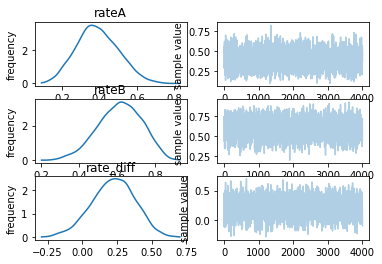

In [11]:
import pystan # install with pip install pystan
import pandas as pd
import numpy as np

# The Stan model as a string.
model_string = """
data {
  # Number of trials
  int nA;
  int nB;
  # Number of successes
  int sA;
  int sB;
}

parameters {
  real<lower=0, upper=1> rateA;
  real<lower=0, upper=1> rateB;
}

model {
  rateA ~ uniform(0, 1);
  rateB ~ uniform(0, 1);
  sA ~ binomial(nA, rateA);
  sB ~ binomial(nB, rateB); 
}

generated quantities {
  real rate_diff;
  rate_diff <- rateB - rateA;
}
"""

data_list = dict(nA = 16, nB = 16, sA = 6, sB = 10)

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)
print(stan_samples)
print(stan_samples.plot())

In [13]:
posterior = pd.DataFrame(stan_samples.extract())
np.mean(posterior.rate_diff > 0) # same as sum(posterior.rate_diff > 0) / len(posterior.rate_diff)

0.91825

In [15]:
posterior

,rateA,rateB,rate_diff,lp__
0,0.250354,0.572294,0.321940,-24.948209
1,0.545397,0.693818,0.148421,-25.221357
2,0.357844,0.754470,0.396626,-24.995266
3,0.278233,0.648813,0.370581,-24.625432
4,0.357575,0.682335,0.324760,-24.298314
...,...,...,...,...
3995,0.300842,0.675158,0.374317,-24.536667
3996,0.298437,0.618579,0.320142,-24.393857
3997,0.339367,0.489645,0.150278,-24.688198
3998,0.509512,0.560276,0.050764,-24.679851
